In [1]:
#analytics
import pandas as pd
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from entropy_python_library.entropy.entropy import *
import mass_ts as mts
from scipy.io import arff

import stumpy
# visuals
import matplotlib.pyplot as plt

/Users/tortysivill/.pyenv/versions/3.7.3/envs/entropy/lib/python3.7/site-packages/mass_ts/_mass_ts.py:18: UserWarning: GPU support will not work. You must pip install mass-ts[gpu].
  'GPU support will not work. You must pip install mass-ts[gpu].')


In [2]:
import complexityparameters

## Import Condition Data

In [3]:
path = "data/useful/ECG/ECG200/"

In [4]:
data = arff.loadarff(path+'ECG200_TRAIN.arff')
print(len(data))
df_data = pd.DataFrame(data[0])

df_data.head()

data_test = arff.loadarff(path+'ECG200_TEST.arff')
df_data_test = pd.DataFrame(data_test[0])

2


In [5]:
Xtrain = df_data.drop(columns=['target']).values
ytrain = df_data['target']

Xtest = df_data_test.drop(columns=['target']).values
ytest = df_data_test['target']

In [6]:
len(Xtrain)

100

In [7]:
len(Xtest)

100

In [8]:
temp_list = []

for x in Xtrain:
    temp_list.append(x)

for x in Xtest:
    temp_list.append(x)
    
len(temp_list)
training_data_raw = temp_list.copy()

In [9]:
len(training_data_raw)

200

In [10]:
temp_list = []

for x in ytrain:
    temp_list.append(x)

for x in ytest:
    temp_list.append(x)

y = temp_list.copy()
len(y)

200

In [11]:
len(training_data_raw[0])

96

In [12]:
y

[b'-1',
 b'1',
 b'-1',
 b'-1',
 b'1',
 b'1',
 b'-1',
 b'-1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'-1',
 b'1',
 b'1',
 b'1',
 b'-1',
 b'-1',
 b'1',
 b'1',
 b'1',
 b'-1',
 b'1',
 b'1',
 b'1',
 b'-1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'-1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'-1',
 b'-1',
 b'1',
 b'-1',
 b'-1',
 b'1',
 b'-1',
 b'1',
 b'1',
 b'1',
 b'-1',
 b'1',
 b'1',
 b'-1',
 b'-1',
 b'1',
 b'1',
 b'1',
 b'-1',
 b'1',
 b'1',
 b'1',
 b'-1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'-1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'-1',
 b'-1',
 b'-1',
 b'-1',
 b'1',
 b'-1',
 b'1',
 b'-1',
 b'1',
 b'1',
 b'-1',
 b'1',
 b'1',
 b'-1',
 b'-1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'-1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'-1',
 b'-1',
 b'1',
 b'-1',
 b'-1',
 b'-1',
 b'1',
 b'1',
 b'1',
 b'-1',
 b'1',
 b'-1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'1',
 b'-1',
 b'1',
 b'-1',
 b'1',
 b'1',
 b'1',
 b'-1',
 b'-1',
 b'1',
 b'1',
 b'1'

In [13]:
count = 0
for item in y:
    if item == b'1':
        count = count + 1
        
print(count)

133


In [14]:
def normalise(X):
    return [(x - min(X))/(max(X)-min(X)) for x in X]

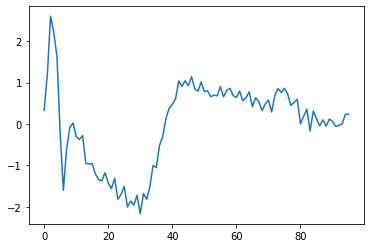

In [15]:
plt.plot(training_data_raw[8])

## Import Control Data

### Extracting the following features from selected data

<ol>
<li>Mean Activity Level</li>
<li>Standard Deviation</li>
<li> Trimmed Mean </li>
</ol>

## Aggregate Features

## Parameter Suite

In [16]:
normalised_complexity_feature_df = complexityparameters.normalised_complexity_features(training_data_raw)

In [17]:
normalised_summary_feature_df = complexityparameters.normalised_summary_features(training_data_raw)

In [18]:
normalised_all_feature_df = complexityparameters.normalised_all_features(training_data_raw)

In [19]:
normalised_summary_feature_df['mean'] = normalise([np.mean(instance) for instance in training_data_raw])
normalised_summary_feature_df['std'] = normalise([np.std(instance) for instance in training_data_raw])
#normalised_summary_feature_df['complexity_feature'] = get_features(20, 0)

### Models 

In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


classifiers = [
    KNeighborsClassifier(1),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


### results from each complexity parameter and all summary features

In [19]:
from sklearn.ensemble import RandomForestClassifier

temp_summary_feature_df = normalised_summary_feature_df.copy()

rfc = RandomForestClassifier()
print(rfc)
for column in normalised_complexity_feature_df:
    temp_summary_feature_df['complexity_feature'] = normalised_complexity_feature_df[[column]]
    X = temp_summary_feature_df.dropna(axis='columns').values
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    F1_scores = []

    accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
    precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
    recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
    F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))

    print(column)
    print(np.mean(accuracy_scores,axis=1))
    print(np.mean(precision_scores,axis=1))
    print(np.mean(recall_scores,axis=1))
    print(np.mean(F1_scores,axis=1))


    print(np.std(accuracy_scores,axis=1))
    print(np.std(precision_scores,axis=1))
    print(np.std(recall_scores,axis=1))
    print(np.std(F1_scores,axis=1))


RandomForestClassifier()
lempel_ziv
[0.86]
[0.8622996]
[0.855]
[0.84196055]
[0.08]
[0.08815414]
[0.07228416]
[0.08082947]
approx
[0.845]
[0.85360714]
[0.875]
[0.85202051]
[0.0820061]
[0.08618857]
[0.09810708]
[0.07912105]
sample
[0.85]
[0.86817262]
[0.845]
[0.85103167]
[0.07416198]
[0.08330282]
[0.07889867]
[0.0905883]
permutation
[0.845]
[0.84733532]
[0.84]
[0.83722703]
[0.065]
[0.09622099]
[0.06244998]
[0.07201149]
spectral
[0.855]
[0.83474237]
[0.845]
[0.86610594]
[0.07889867]
[0.07520646]
[0.07566373]
[0.08218538]
skewness
[0.835]
[0.85887698]
[0.84]
[0.8318454]
[0.055]
[0.08558137]
[0.08306624]
[0.07231102]
kurtosis
[0.83]
[0.86276984]
[0.855]
[0.85223536]
[0.0678233]
[0.08900969]
[0.07889867]
[0.0872621]
SVD
[0.84]
[0.84730952]
[0.855]
[0.83604727]
[0.07681146]
[0.07815518]
[0.07228416]
[0.07569521]


### Results from ALL features

In [20]:
from sklearn.ensemble import RandomForestClassifier

temp_all_feature_df = normalised_all_feature_df.copy()
temp_all_feature_df['mean'] = normalise([np.mean(instance) for instance in training_data_raw])
temp_all_feature_df['std'] = normalise([np.std(instance) for instance in training_data_raw])

X = temp_all_feature_df.dropna(axis='columns').values
rfc = RandomForestClassifier()
print(rfc)
accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []

accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))

print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


RandomForestClassifier()
[0.86]
[0.82852312]
[0.835]
[0.83157737]
[0.07681146]
[0.07680948]
[0.07088723]
[0.0795387]


### Dont want all features - curse of dimensionality and not very intepretable - lets try and think more about our features

In [24]:
import seaborn as sn

#### lets plot correlation for the complexity features

In [25]:
corrMatrix = normalised_complexity_feature_df.corr()

#### visualise correlation matrix

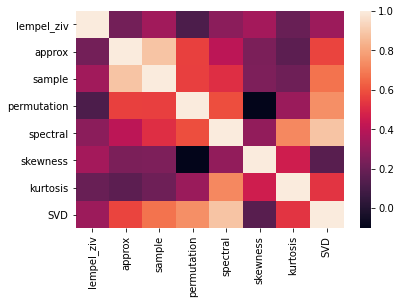

In [26]:
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [27]:
### lets plot correlation for the summary features (first half)

In [28]:
corrMatrix = normalised_summary_feature_df.iloc[:, 0:10].corr()

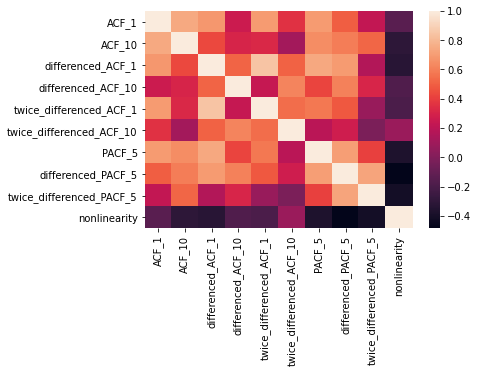

In [29]:
sn.heatmap(corrMatrix, annot=False)
plt.show()

#### lets plot correlation for the summary features (second half)

In [30]:
corrMatrix = normalised_summary_feature_df.iloc[:, 10:].corr()

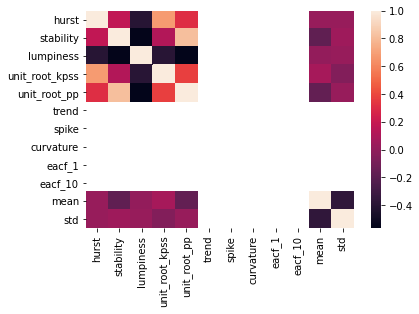

In [31]:
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [32]:
#### lets plot correlation for the summary features (second half)

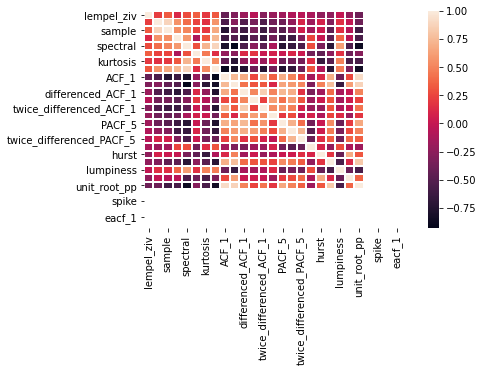

In [33]:
corrMatrix = normalised_all_feature_df.corr()
sn.heatmap(corrMatrix, annot=False, linewidths=1.)
plt.savefig('correlation_matrix.eps')
plt.show()

### Feature Importances

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

model = RandomForestClassifier().fit(X_train, y_train)
print(model.score(X_val, y_val))

0.86


### Permutation Feature Importance

In [35]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val,n_repeats=30,random_state=0)

Depresjon_feature_names = temp_all_feature_df.dropna(axis='columns').columns
for i in r.importances_mean.argsort()[::-1]:
    print(f"{Depresjon_feature_names[i]:<8}"f"{r.importances_mean[i]:.3f}"f" +/- {r.importances_std[i]:.3f}")

permutation0.013 +/- 0.011
ACF_1   0.011 +/- 0.016
twice_differenced_ACF_10.003 +/- 0.018
kurtosis0.000 +/- 0.000
lempel_ziv0.000 +/- 0.000
hurst   -0.001 +/- 0.018
unit_root_pp-0.001 +/- 0.004
differenced_PACF_5-0.001 +/- 0.004
SVD     -0.001 +/- 0.005
nonlinearity-0.007 +/- 0.009
std     -0.010 +/- 0.012
unit_root_kpss-0.010 +/- 0.013
PACF_5  -0.011 +/- 0.010
differenced_ACF_1-0.012 +/- 0.013
mean    -0.013 +/- 0.014
twice_differenced_ACF_10-0.013 +/- 0.013
ACF_10  -0.015 +/- 0.014
skewness-0.015 +/- 0.014
twice_differenced_PACF_5-0.017 +/- 0.007
lumpiness-0.019 +/- 0.013
approx  -0.021 +/- 0.014
differenced_ACF_10-0.025 +/- 0.017
stability-0.025 +/- 0.015
sample  -0.033 +/- 0.011


### LIME

21-Mar-03 09:43:19 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.
21-Mar-03 09:43:20 fatf.transparency.predictions.surrogate_explainers INFO     Selecting 24 features with highest weights.


{'condition': {'0.50 < *lempel_ziv*': 0.0046520391642870555, '0.62 < *approx*': 0.013284574176759666, '0.35 < *sample*': -0.010883895972197162, '0.84 < *permutation*': 0.00029745224935872136, '0.41 < *skewness* <= 0.54': -0.026940039454453266, '0.23 < *kurtosis* <= 0.37': -0.0303802610158492, '0.54 < *SVD*': -0.04179354769840366, '*ACF_1* <= 0.81': -0.06189855366152718, '*ACF_10* <= 0.41': 0.055233677241290836, '*differenced_ACF_1* <= 0.45': -0.040820736959130244, '0.22 < *differenced_ACF_10* <= 0.32': 0.014455370890786618, '*twice_differenced_ACF_1* <= 0.54': -0.04964253297551334, '0.35 < *twice_differenced_ACF_10* <= 0.45': -0.016136938016416635, '*PACF_5* <= 0.35': -0.03544270536869613, '*differenced_PACF_5* <= 0.12': -0.03578801805157236, '0.16 < *twice_differenced_PACF_5* <= 0.26': -0.027500239115902096, '0.16 < *nonlinearity* <= 0.27': -0.005147885412277586, '0.59 < *hurst*': -0.0641066643506093, '0.59 < *stability* <= 0.75': -0.029363456068887583, '0.07 < *lumpiness* <= 0.17': 0

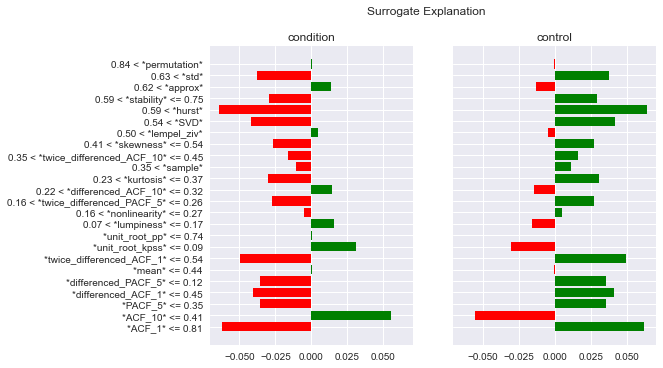

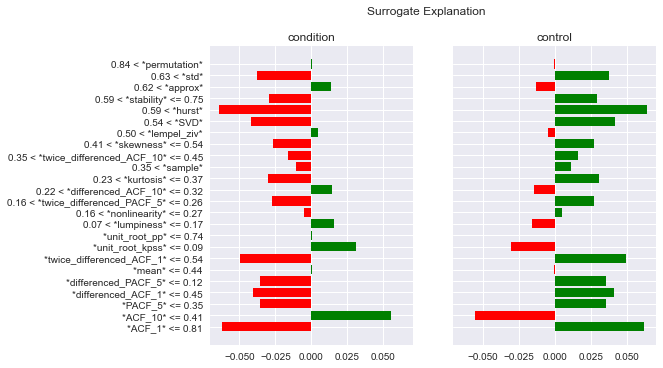

In [36]:
import fatf.transparency.predictions.surrogate_explainers as fatf_surrogates
import fatf.vis.lime as fatf_vis_lime

Depresjon_class_names = ['condition','control']
lime = fatf_surrogates.TabularBlimeyLime(
    X_train,
    model,
    feature_names=list(Depresjon_feature_names),
    class_names=Depresjon_class_names)

# Choose an index of the instance to be explained
index_to_explain = 0

# Explain an instance
lime_explanation = lime.explain_instance(
    X_train[index_to_explain, :], samples_number=50)

# Display the textual explanation
print(lime_explanation)

# Plot the explanation
fatf_vis_lime.plot_lime(lime_explanation)

In [37]:
### SHAP

Index(['lempel_ziv', 'approx', 'sample', 'permutation', 'skewness', 'kurtosis',
       'SVD', 'ACF_1', 'ACF_10', 'differenced_ACF_1', 'differenced_ACF_10',
       'twice_differenced_ACF_1', 'twice_differenced_ACF_10', 'PACF_5',
       'differenced_PACF_5', 'twice_differenced_PACF_5', 'nonlinearity',
       'hurst', 'stability', 'lumpiness', 'unit_root_kpss', 'unit_root_pp',
       'mean', 'std'],
      dtype='object')


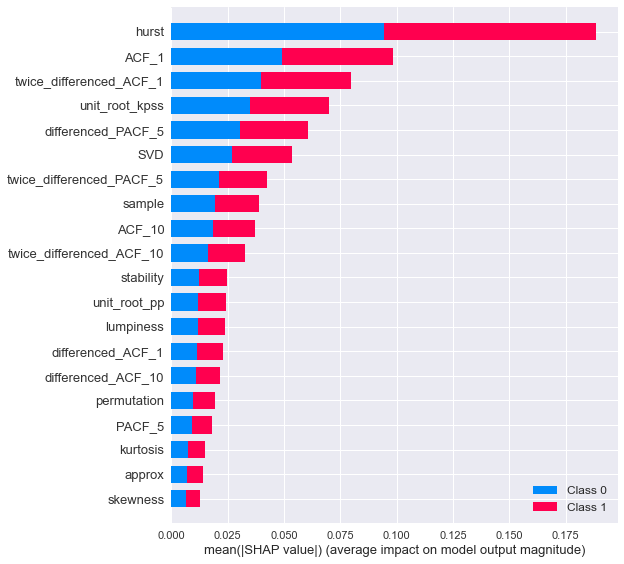

In [38]:
import shap
shap.initjs()

model = RandomForestClassifier().fit(normalised_all_feature_df.dropna(axis='columns').values, y)
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(normalised_all_feature_df.values)
print(Depresjon_feature_names)
shap.summary_plot(shap_values, normalised_all_feature_df.values, Depresjon_feature_names)

In [39]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(normalised_all_feature_df.columns,vals)),columns=['col_name','feature_importance_vals'])

feature_importance['feature_importance_mean'] = np.mean(feature_importance['feature_importance_vals'])

feature_importance.sort_values(by=['feature_importance_mean'],ascending=False,inplace=True)
feature_importance.head()


top_5_features = feature_importance['col_name'][0:5].values
top_10_features = feature_importance['col_name'][0:10].values
top_15_features = feature_importance['col_name'][0:15].values
top_20_features = feature_importance['col_name'][0:20].values
top_25_features = feature_importance['col_name'][0:25].values
all_features = feature_importance['col_name'].values

feature_combinations = [top_5_features, top_10_features, top_15_features, top_20_features, top_25_features, all_features]

### Top Features

In [40]:
#### Spectral Entropy

In [224]:
from sklearn.ensemble import RandomForestClassifier


rfc = KNeighborsClassifier(n_neighbors=1)

for feature_combination in feature_combinations:
    temp_summary_feature_df = normalised_all_feature_df.copy()
    X = temp_summary_feature_df[feature_combination].values
    #top 10 features
    #X = temp_summary_feature_df[['complexity_feature', 'trend', 'unit_root_kpss', 'mean', 'eacf_10', 'std', 'ACF_10', 'curvature', 'twice_differenced_ACF_10', 'stability', 'spike']].values

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    F1_scores = []

    accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
    precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
    recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
    F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))

    print(feature_combination)
    print(np.mean(accuracy_scores,axis=1))
    print(np.mean(precision_scores,axis=1))
    print(np.mean(recall_scores,axis=1))
    print(np.mean(F1_scores,axis=1))


    print(np.std(accuracy_scores,axis=1))
    print(np.std(precision_scores,axis=1))
    print(np.std(recall_scores,axis=1))
    print(np.std(F1_scores,axis=1))

['nonlinearity' 'lumpiness' 'SVD' 'differenced_ACF_10' 'PACF_5']
[0.68]
[0.67580676]
[0.68]
[0.66844675]
[0.0678233]
[0.08811361]
[0.0678233]
[0.07677215]
['nonlinearity' 'lumpiness' 'SVD' 'differenced_ACF_10' 'PACF_5' 'kurtosis'
 'differenced_PACF_5' 'sample' 'ACF_1' 'differenced_ACF_1']
[0.81]
[0.82222076]
[0.81]
[0.80318666]
[0.04358899]
[0.05279125]
[0.04358899]
[0.04806507]
['nonlinearity' 'lumpiness' 'SVD' 'differenced_ACF_10' 'PACF_5' 'kurtosis'
 'differenced_PACF_5' 'sample' 'ACF_1' 'differenced_ACF_1'
 'twice_differenced_ACF_1' 'stability' 'ACF_10' 'unit_root_kpss'
 'twice_differenced_ACF_10']
[0.785]
[0.79322511]
[0.785]
[0.77680962]
[0.06726812]
[0.06606586]
[0.06726812]
[0.06451561]
['nonlinearity' 'lumpiness' 'SVD' 'differenced_ACF_10' 'PACF_5' 'kurtosis'
 'differenced_PACF_5' 'sample' 'ACF_1' 'differenced_ACF_1'
 'twice_differenced_ACF_1' 'stability' 'ACF_10' 'unit_root_kpss'
 'twice_differenced_ACF_10' 'permutation' 'hurst' 'skewness' 'approx'
 'spectral']
[nan]
[nan]
[n

### No Complexity Features

In [43]:
from sklearn.ensemble import RandomForestClassifier


rfc = KNeighborsClassifier(n_neighbors=1)

temp_summary_feature_df = normalised_summary_feature_df.copy()
X = temp_summary_feature_df.dropna(axis='columns').values
#top 10 features
#X = temp_summary_feature_df[['complexity_feature', 'trend', 'unit_root_kpss', 'mean', 'eacf_10', 'std', 'ACF_10', 'curvature', 'twice_differenced_ACF_10', 'stability', 'spike']].values

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []

accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))

print(feature_combination)
print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))

['nonlinearity' 'lumpiness' 'SVD' 'differenced_ACF_10' 'PACF_5']
[0.805]
[0.81508034]
[0.805]
[0.80062467]
[0.065]
[0.07012465]
[0.065]
[0.06791556]


In [20]:
temp_summary_feature_df = normalised_summary_feature_df.copy()

X = temp_summary_feature_df.dropna(axis='columns')
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.05)

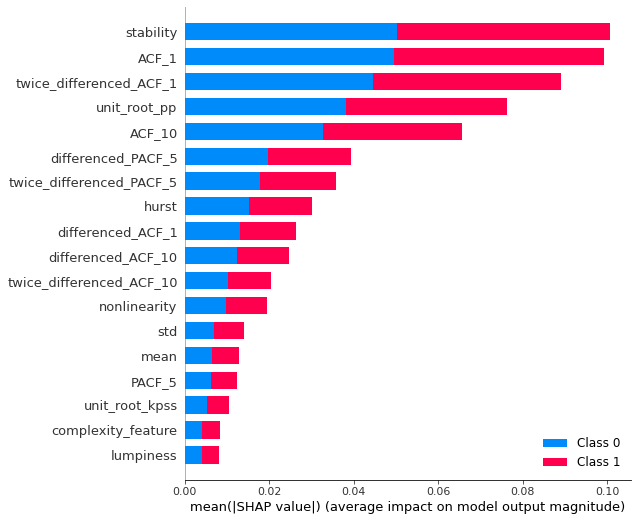

In [62]:
import shap
shap.initjs()

model = RandomForestClassifier().fit(X_val.values, y_val)
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val.values)
shap.summary_plot(shap_values, X_val.values, normalised_summary_feature_df.dropna(axis='columns').columns )

In [63]:

X_selected = X_train[['complexity_feature','stability','ACF_1','twice_differenced_ACF_1','unit_root_pp']]


rfc = RandomForestClassifier()

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X_selected, y_train, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X_selected, y_train, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X_selected, y_train, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X_selected, y_train, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))

[0.76]
[0.7926936]
[0.78]
[0.77453958]
[0.11234866]
[0.11396083]
[0.1231079]
[0.12641589]


### My Features

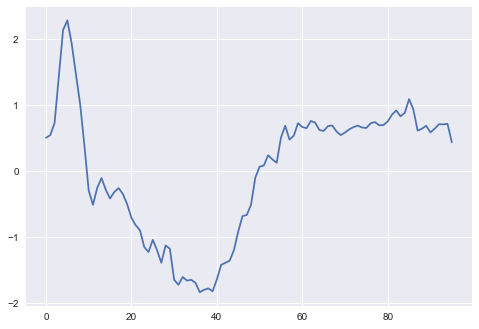

In [111]:
plt.plot(training_data_raw[0])

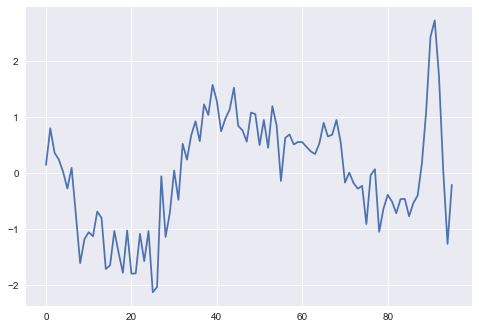

In [143]:
plt.plot(training_data_raw[1])

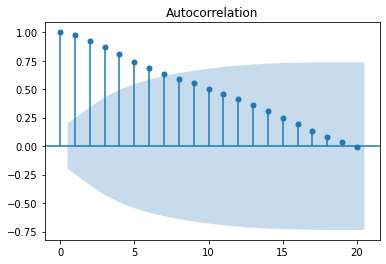

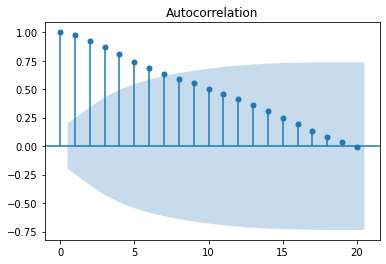

In [21]:
import statsmodels as sm

sm.graphics.tsaplots.plot_acf(training_data_raw[0])

In [22]:
window_size_parameter = 20

In [23]:
def DP_entropy(x,window): 
    bins = 2
    time_series = np.array(x,dtype=float)
    matrix_profile = stumpy.stump(time_series, m=window)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= matrix_profile[:,0]
    distance_sum = np.sum(df_matrix_profile['distances'])
    total = len(df_matrix_profile['distances'])
    categorical_object = pd.cut(df_matrix_profile['distances'], bins)
    counts = []
    for bini in range(0,bins):
        counts.append(categorical_object.value_counts().values[bini]/total)
    entropy = -np.sum([(x)*np.log(x) for x in counts])
    return entropy

In [24]:
from scipy import signal

def DP_flatness_motif(x,window):
    time_series = np.array(x,dtype=float)
    my_window = len(time_series) - window
    window_size = window # Approximately, how many data points might be found in a pattern
    matrix_profile = stumpy.stump(time_series, m=window_size)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= matrix_profile[:,0]
    df_matrix_profile['indexes']= df_matrix_profile.index
    top_motifs = df_matrix_profile.sort_values(by='distances')[0:10]
    distance_sum = np.sum(top_motifs['distances'])
    entropy_sum = np.sum([np.log(x) for x in top_motifs['distances']])
    entropy = entropy_sum * 1/len(top_motifs['distances'])
    entropy = np.exp(entropy)
    #entropy = entropy/(distance_sum/len(top_motifs['distances']))
    return entropy

In [25]:
from scipy import signal

def DP_flatness(x,window):
    time_series = np.array(x,dtype=float)
    my_window = len(time_series) - window
    window_size = window # Approximately, how many data points might be found in a pattern
    matrix_profile = stumpy.stump(time_series, m=window_size)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= matrix_profile[:,0]
    df_matrix_profile['indexes']= df_matrix_profile.index
    top_motifs = df_matrix_profile.sort_values(by='distances')
    distance_sum = np.sum(df_matrix_profile['distances'])
    entropy_sum = np.sum([np.log(x) for x in df_matrix_profile['distances']])
    entropy = entropy_sum * 1/len(df_matrix_profile['distances'])
    entropy = np.exp(entropy)
    entropy = entropy/(distance_sum/len(df_matrix_profile['distances']))
    return entropy

In [26]:
def sequential_entropy(x,window):
    yes = 0
    time_series = np.array(x,dtype=float)
    window_size = window # Approximately, how many data points might be found in a pattern
    matrix_profile = stumpy.stump(time_series, m=window_size)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= matrix_profile[:,0]
    df_matrix_profile['left_index']= matrix_profile[:,1]
    a_s = len(df_matrix_profile.index)
    for x in range(0,len(df_matrix_profile.index)-1):
        if df_matrix_profile['left_index'].iloc[x+1] == df_matrix_profile['left_index'].iloc[x] + 1:
            yes = yes + 1
    return np.log(a_s) - np.log(yes)

In [27]:
top_features = ['complexity_feature', 'lumpiness', 'spike', 'trend', 'ACF_1', 'twice_differenced_ACF_10']

In [28]:
from scipy.stats import skew
from scipy.stats import kurtosis

def get_features(window, feature):
    entropy_feature = []
    
    
    for x in training_data_raw:
        if feature == 0:
            entropy_feature.append(DP_entropy(x, window))
        elif feature == 1:
            entropy_feature.append(DP_split_flatness(x, window))
        elif feature == 2:
            entropy_feature.append(sequential_entropy(x, window))
        elif feature == 3:
            entropy_feature.append(DP_flatness_motif(x,window))
    
    temp_summary_feature_df = normalised_summary_feature_df.copy()
    return normalise(entropy_feature)
   #return(temp_summary_feature_df[['complexity_feature', 'mean', 'std']].values)


In [29]:
from scipy.stats import skew
from scipy.stats import kurtosis

def features(window, feature):
    entropy_feature = []
    
    
    for x in training_data_raw:
        if feature == 0:
            entropy_feature.append(DP_entropy(x, window))
        elif feature == 1:
            entropy_feature.append(DP_flatness(x, window))
        elif feature == 2:
            entropy_feature.append(sequential_entropy(x, window))
        elif feature == 3:
            entropy_feature.append(DP_flatness_motif(x,window))
    
    temp_summary_feature_df = normalised_summary_feature_df.copy()
    temp_summary_feature_df['complexity_feature'] = normalise(entropy_feature)
    #print(temp_summary_feature_df['complexity_feature'])
    ['complexity_feature','stability','ACF_1','twice_differenced_ACF_1','unit_root_pp']
    return(temp_summary_feature_df[['complexity_feature','stability','ACF_1','twice_differenced_ACF_1','unit_root_pp']].values)
    #return(temp_summary_feature_df.dropna(axis='columns').values)



In [34]:
## Results for DP Entropy

In [35]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier


X = features(window_size_parameter,0) #2400 #up to 2500
rfc = RandomForestClassifier()
accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


[0.79]
[0.80352076]
[0.81]
[0.78274009]
[0.07681146]
[0.10601817]
[0.08602325]
[0.08887582]


In [36]:
### Results for DP Flatness

In [37]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier


X = features(window_size_parameter,1) #2400 #up to 2500
rfc = RandomForestClassifier()
   

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


[0.775]
[0.80129746]
[0.775]
[0.78392207]
[0.0813941]
[0.11963124]
[0.08440972]
[0.10631991]


In [38]:
### Results for Sequential Entropy

In [39]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier

X = features(window_size_parameter,2) #2400 #up to 2500
rfc = RandomForestClassifier()
accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


[0.76]
[0.77289379]
[0.78]
[0.77975517]
[0.09433981]
[0.11574266]
[0.09273618]
[0.11104109]


In [40]:
def calculate_DP(x):
    matrix_profile_A = stumpy.stump(x, m=5)
    matrix_profile_B = stumpy.stump(x, m=18)
    matrix_profile_C = stumpy.stump(x, m=35)
    matrix_profile_D = stumpy.stump(x, m=50)
    
    matrix_profiles = zip(matrix_profile_A, matrix_profile_B, matrix_profile_C, matrix_profile_D)

    distance_profile = []
    A_mean = np.mean(matrix_profile_A[:,0])
    B_mean = np.mean(matrix_profile_B[:,0])
    C_mean = np.mean(matrix_profile_C[:,0])
    D_mean= np.mean(matrix_profile_D[:,0])
    
    for A,B,C,D in matrix_profiles:
        A_vary = A_mean - A[0]
        B_vary = B_mean - B[0]
        C_vary = C_mean - C[0]
        D_vary = D_mean - D[0]
        distance_profile.append(np.max([A_vary, B_vary, C_vary, D_vary])**2)
    return(distance_profile)



In [41]:
from scipy import signal

def DP_split_flatness(x,window):
    time_series = np.array(x,dtype=float)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= calculate_DP(time_series)
    #df_matrix_profile['indexes']= df_matrix_profile.index
    top_motifs = df_matrix_profile.sort_values(by='distances')[0:20]
    distance_sum = np.sum(top_motifs['distances'])
    entropy_sum = np.sum([np.log(x) for x in top_motifs['distances']])
    entropy = entropy_sum * 1/len(top_motifs['distances'])
    entropy = np.exp(entropy)
    return entropy

In [42]:
from scipy import signal

def DP_split_entropy(x,window):
    bins = 2
    time_series = np.array(x,dtype=float)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= calculate_DP(time_series)
    #df_matrix_profile['indexes']= df_matrix_profile.index
    distance_sum = np.sum(df_matrix_profile['distances'])
    total = len(df_matrix_profile['distances'])
    df_matrix_profile.dropna()
    categorical_object = pd.cut(df_matrix_profile['distances'], bins)
    counts = []
    for bini in range(0,bins):
        counts.append(categorical_object.value_counts().values[bini]/total)
    entropy = -np.sum([(c)*np.log(c) for c in counts])
    return entropy
    return entropy

In [43]:
def calculate_DP_Sequential(x):
    matrix_profile_A = stumpy.stump(x, m=5)
    matrix_profile_B = stumpy.stump(x, m=18)
    matrix_profile_C = stumpy.stump(x, m=35)
    matrix_profile_D = stumpy.stump(x, m=50)

    matrix_profiles = zip(matrix_profile_A, matrix_profile_B, matrix_profile_C, matrix_profile_D)
    
    distance_profile = []
    A_mean = np.mean(matrix_profile_A[:,0])
    B_mean = np.mean(matrix_profile_B[:,0])
    C_mean = np.mean(matrix_profile_C[:,0])
    D_mean= np.mean(matrix_profile_D[:,0])
    
    for A,B,C,D in matrix_profiles:
        A_vary = A_mean - A[0]
        B_vary = B_mean - B[0]
        C_vary = C_mean - C[0]
        D_vary = D_mean - D[0]
        highest_index = np.argmax([A_vary, B_vary, C_vary, D_vary])
        if highest_index == 0:
            distance_profile.append(A[1])
        elif highest_index == 1:
            distance_profile.append(B[1])
        elif highest_index == 2:
            distance_profile.append(C[1])
        elif highest_index == 3:
            distance_profile.append(D[1]) 
    return(distance_profile)

In [44]:
def sequential_split_entropy(x,window):
    yes = 0
    time_series = np.array(x,dtype=float)
    window_size = window # Approximately, how many data points might be found in a pattern
    matrix_profile = stumpy.stump(time_series, m=window_size)
    neighbour_indexes = calculate_DP_Sequential(time_series)
  
    a_s = len(neighbour_indexes)
    for x in range(0,len(neighbour_indexes)-1):
        if neighbour_indexes[x+1] == neighbour_indexes[x] + 1:
            yes = yes + 1
    return np.log(a_s) - np.log(yes)

In [45]:
from scipy.stats import skew
from scipy.stats import kurtosis

def features2(window, feature):
    entropy_feature = []
    
    
    for x in training_data_raw:
        if feature == 0:
            entropy_feature.append(DP_split_entropy(x, window))
        elif feature == 1:
            entropy_feature.append(DP_split_flatness(x, window))
        elif feature == 2:
            entropy_feature.append(sequential_split_entropy(x, window))
    
    temp_summary_feature_df = normalised_summary_feature_df.copy()
    temp_summary_feature_df['complexity_feature'] = normalise(entropy_feature)
    #return(temp_summary_feature_df.dropna(axis='columns').values)
    return(temp_summary_feature_df[['complexity_feature','stability','ACF_1','twice_differenced_ACF_1','unit_root_pp']].values)
    #return(temp_summary_feature_df[['complexity_feature','mean','std']].values)



In [46]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier

X = features2(window_size_parameter,0) #2400 #up to 2500
rfc = RandomForestClassifier()
    

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


[0.775]
[0.78575893]
[0.8]
[0.73967524]
[0.075]
[0.08888391]
[0.1118034]
[0.12325011]


In [47]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier

X = features2(window_size_parameter,1) #2400 #up to 2500
rfc = RandomForestClassifier()
    

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


[0.785]
[0.79978274]
[0.805]
[0.78463749]
[0.07433034]
[0.09337717]
[0.07566373]
[0.09378829]


In [48]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier

X = features2(window_size_parameter,2) #2400 #up to 2500
rfc = RandomForestClassifier()
    

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


[0.775]
[0.80252731]
[0.8]
[0.7905729]
[0.0813941]
[0.07855735]
[0.09486833]
[0.09289654]
